In [1]:
import numpy as np
import pandas as pd

## Выбор и описание данных

Выбраны данные Heart Disease с сайта https://archive.ics.uci.edu/ml/datasets/Heart+Disease. На их основе можно сделать прогнозирование заболеваний сердца.<br>
На сайте представлены 4 базы данных по диагностике болезней сердца из следующих мед. учреждений:
<ol>
    <li>Фонд клиники Кливленда (cleveland.data)</li>
    <li>Венгерский институт кардиологии, Будапешт (hungarian.data)</li>
    <li>В.А. Медицинский центр, Лонг-Бич, Калифорния (long-beach-va.data)</li>
    <li>Университетская клиника, Цюрих, Швейцария (switzerland.data)</li>
</ol>
В каждой базе данных имеется информация о 76 показателях состояния пациента, на основе которых ставится диагноз. Присутствуют пропуски данных, отмечены значением -9,0.<br>
Для анализа были взяты данные из Фонда клиники Кливленда (cleveland.data). Они содержат неинформативные столбцы с одинаковыми значениями во всех строках, не заполненные данными столбцы, а также столбцы, помеченные составителями базы данных как неиспользуемые. Такие столбцы не учитывались при дальнейшем анализе.

In [2]:
# Выборка из всех данных столбцов, которые можно анализировать
pdata = pd.read_csv('cleveland.csv', delimiter=';')[["id","age","sex","cp","trestbps","chol","fbs","famhist","restecg","ekgmo","ekgday","ekgyr","dig","prop","nitr","pro","diuretic","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","exang","xhypo","oldpeak","slope","ca","thal","num"]]
pdata.head()

,id,age,sex,cp,trestbps,chol,fbs,famhist,restecg,ekgmo,...,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,1,2,2,...,190,90,85,0,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,1,2,3,...,160,90,90,1,0,1.5,2,3,3,2
2,3,67,1,4,120,229,0,1,2,2,...,140,80,80,1,0,2.6,2,2,7,1
3,4,37,1,3,130,250,0,1,0,2,...,195,68,78,0,0,3.5,3,0,3,0
4,6,41,0,2,130,204,0,1,2,2,...,160,74,86,0,0,1.4,1,0,3,0


## Описание показателей

Из 76 столбцов было выбрано 29, данные которых можно проанализировать.<br><br>
<b>Общая информация</b><br>
1 id: уникальный номер пациента в списке<br>
3 age: возраст на момент обследования (в годах)<br>
4 sex: пол (1 = мужской; 0 = женский)<br><br>
<b>Данные истории болезни</b><br>
9 cp: тип боли в груди<br>
-- Значение 1: типичная стенокардия<br>
-- Значение 2: атипичная стенокардия<br>
-- Значение 3: неангинозная боль<br>
-- Значение 4: бессимптомный<br>
10 trestbps: систолическое артериальное давление в состоянии покоя при поступлении в больницу (в мм рт. ст.)<br>
12 chol: содержание холестерина (в мг/дл)<br> 
16 fbs: уровень сахара в крови натощак > 120 мг/дл (1 = да; 0 = нет)<br>
18 famhist: была ли у кого-то в семье ишемическая болезнь сердца (1 = да; 0 = нет)<br>
19 restecg: результаты электрокардиографии в покое<br>
-- Значение 0: нормальный<br>
-- Значение 1: наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ)<br>
-- Значение 2: показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса<br><br>
<b>Дата проведения ЭКГ</b><br>
20 ekgmo: месяц проведения ЭКГ (от 1 до 12)<br>
21 ekgday: день проведения ЭКГ (от 1 до 31)<br>
22 ekgyr: год проведения ЭКГ (от 1981 до 1984)<br><br>
<b>Медикаментозное лечение в период проведения обследования</b><br>
23 dig: прием дигиталиса в период проведения ЭКГ (1 = да; 0 = нет)<br>
24 prop: прием бета блокаторов в период проведения ЭКГ (1 = да; 0 = нет)<br>
25 nitr: прием нитратов в период проведения ЭКГ (1 = да; 0 = нет)<br>
26 pro: прием блокаторов кальциевых каналов в период проведения ЭКГ (1 = да; 0 = нет)<br>
27 diuretic: прием диуретиков в период проведения ЭКГ (1 = да; 0 = нет)<br><br>
<b>Данные электрокардиограммы</b><br>
32 thalach: максимальная частота сердечных сокращений (кол-во раз)<br>
33 thalrest: частота сердечных сокращений в покое (кол-во раз)<br>
34 tpeakbps: пиковое артериальное давление при физической нагрузке, первая из 2 частей (в мм рт. ст.)<br>
35 tpeakbpd: пиковое артериальное давление при физической нагрузке, вторая из 2 частей (в мм рт. ст.)<br>
37 trestbpd: диастолическое артериальное давление в покое (в мм рт. ст.)<br>
38 exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)<br>
39 xhypo: гипотензия, вызванная физической нагрузкой (1 = да; 0 = нет)<br>
40 oldpeak: депрессия сегмента ST, вызванная физической нагрузкой, по сравнению с состоянием покоя (в мм)<br>
41 slope: наклон пикового сегмента ST при нагрузке<br>
-- Значение 1: восходящий<br>
-- Значение 2: плоский<br>
-- Значение 3: нисходящий<br><br>
<b>Данные рентгеноскопии сердца</b><br>
44 ca: количество крупных сосудов, окрашенных при рентгеноскопии<br><br>
<b>Данные сцинтиграфии с таллием с физической нагрузкой</b><br>
51 thal: результат сцинтиграфии с таллием<br>
--Значение 3: нормальный<br>
--Значение 6: фиксированный дефект<br>
--Значение 7: обратимый дефект<br><br>
<b>Диагноз</b><br>
58 num: наличие болезни сердца<br>
-- Значение 0: нет<br>
-- Значения 1-4: есть, предположительно, значение определяет степень тяжести заболевания

## Характеристики некоторых столбцов

In [3]:
# Подсчитываем частоты уникальных значений показателя
pdata["sex"].value_counts()

1    191
0     91
Name: sex, dtype: int64

In [4]:
# Данные по показателю возраст
# В результате имеем информацию о:
# среднем значении возраста пациентов, 
# стандартное отклонение, 
# возраст самого молодого пациента и самого пожилого, 
# 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениями
pdata["age"].describe()

count    282.000000
mean      54.411348
std        9.053083
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [5]:
# Средний возраст мужчин
round(pdata[pdata["sex"] == 1]["age"].mean(), 2)

53.84

In [6]:
# Средний возраст женщин
round(pdata[pdata["sex"] == 0]["age"].mean(), 2)

55.6

In [7]:
# Среднее значение систолического артериального давления в состоянии покоя при поступлении в больницу
round(pdata["trestbps"].mean(), 2)

131.56

In [8]:
# Количество человек с различным типом боли в груди
pdata["cp"].value_counts()

4    133
3     84
2     43
1     22
Name: cp, dtype: int64

In [9]:
# Самый часто встречающийся результат электрокардиографии в покое
# Получено, что у большинста пациентов наблюдается гипертрофия левого желудочка по критериям Эстеса (значение 2)
pdata["restecg"].mode()

0    2
dtype: int64

In [10]:
# Количество пациентов, которые принимают лекарства в период проведения обследования
((pdata["dig"] == 1) | (pdata["prop"] == 1) | (pdata["nitr"] == 1) | (pdata["pro"] == 1) | (pdata["diuretic"] == 1)).sum()

148

In [11]:
# Результат сцинтиграфии с таллием среди мужчин (3 - нормальный результат)
pdata[pdata["sex"] == 1]["thal"].value_counts()

 7    94
 3    82
 6    14
-9     1
Name: thal, dtype: int64

In [12]:
# Результат сцинтиграфии с таллием среди женщин (3 - нормальный результат)
# Среди женщин больше здоровых пациентов, чем среди мужчин
pdata[pdata["sex"] == 0]["thal"].value_counts()

 3    77
 7    13
-9     1
Name: thal, dtype: int64

In [13]:
# Группировка данных по полу, диагнозу и подсчет среднего возраста пациентов в каждой группе
groups = pdata.groupby(["num", "sex"])
for (num, sex), g in groups:
    print("num: {0:2}    sex: {1:2}    mean age: {2:5.2f}".format(num, sex, g["age"].mean()))

num:  0    sex:  0    mean age: 54.55
num:  0    sex:  1    mean age: 51.30
num:  1    sex:  0    mean age: 61.00
num:  1    sex:  1    mean age: 54.34
num:  2    sex:  0    mean age: 54.83
num:  2    sex:  1    mean age: 58.64
num:  3    sex:  0    mean age: 60.67
num:  3    sex:  1    mean age: 54.81
num:  4    sex:  0    mean age: 64.00
num:  4    sex:  1    mean age: 59.00


In [14]:
# Наличие заболевания сердца среди женщин моложе 40
# Получено, что все женщины из этой выборки здоровы
pdata[(pdata["sex"] == 0) & (pdata["age"] < 40)]["num"].value_counts()

0    5
Name: num, dtype: int64

In [15]:
# Процент пациентов с заболеваниями сердца среди мужчин старше 60
oldmen = pdata[(pdata["sex"] == 1) & (pdata["age"] > 60)]
print("{0:.0%}".format(round((oldmen["num"] != 0).sum() / len(oldmen), 2)))

68%


## Визуализация для отдельных показателей

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='cp', ylabel='count'>

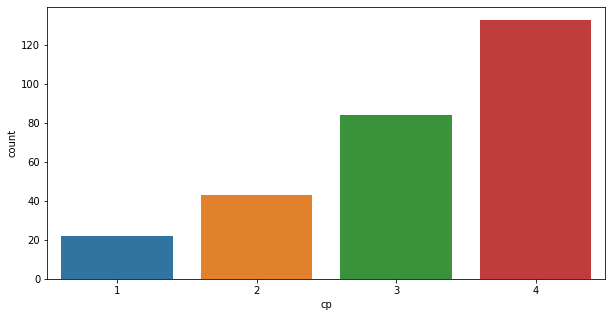

In [17]:
# Диаграмма частот для категорийного показателя
# Количество пациентов c определенным типом боли в груди
fig = plt.figure(figsize = (10, 5))
sns.countplot(x="cp", data = pdata)

<AxesSubplot:xlabel='num', ylabel='count'>

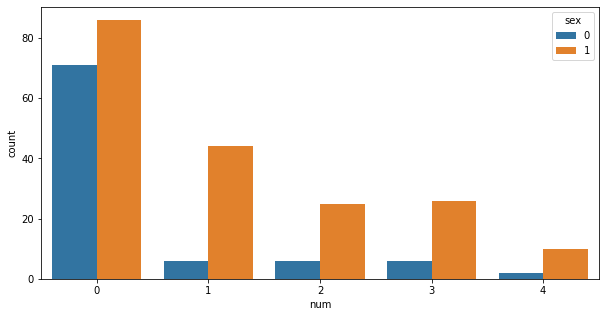

In [18]:
# Диаграмма частот с группировкой
# Наличие и отсутствие заболеваний у мужчин и женщин
fig = plt.figure(figsize = (10, 5))
sns.countplot(x="num", hue = "sex", data = pdata)

In [19]:
# Точные значения для полученной выше диаграммы
pdata.groupby(["num", "sex"]).size().unstack(fill_value=0)

sex,0,1
num,,
0,71,86
1,6,44
2,6,25
3,6,26
4,2,10


<AxesSubplot:xlabel='restecg', ylabel='age'>

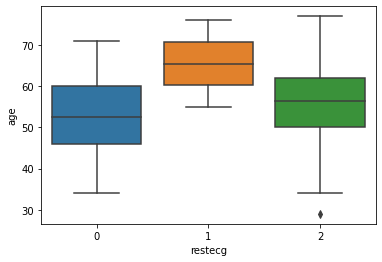

In [20]:
# Диаграмма размаха 
# Наличие аномалии ST-T (значение 1) наблюдается в основном у пожилых пациентов
sns.boxplot(x = "restecg", y = "age", data = pdata)

array([[<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'thalrest'}>]], dtype=object)

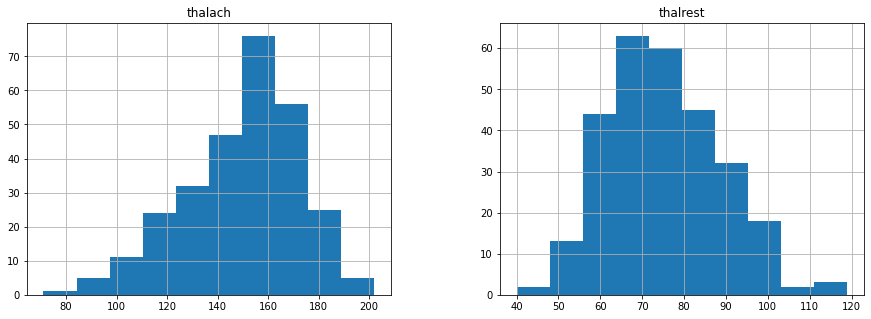

In [21]:
# Гистограммы 
# Распределение максимальной частота сердечных сокращений и частоты сердечных сокращений в покое
pdata[["thalach","thalrest"]].hist(figsize=(15,5))

<AxesSubplot:xlabel='chol', ylabel='Count'>

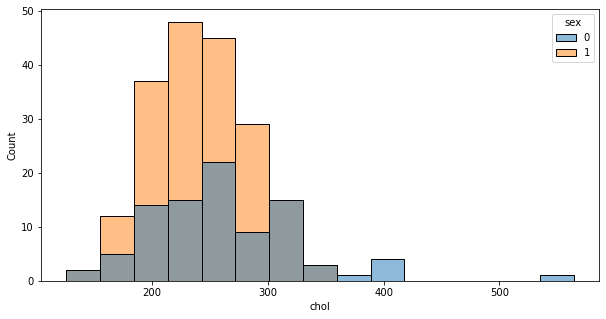

In [22]:
# Гистограмма содержания холестерина у мужчин и женщин
fig = plt.figure(figsize = (10, 5))
sns.histplot(x = "chol", data = pdata, bins = 15, hue = "sex") 

## Группировка объектов

Проводилась группировка по качественному показателю num - наличию болезни сердца.

In [23]:
# Группировка по наличию заболевания и расчет средних значений количественных показателей
sickgroups = pdata.groupby("num")
print("Всего %d групп" % len(sickgroups))
for num, s in sickgroups:
    print("n: {0:2}  age: {1:2.0f}  chol: {2:3.0f}  thalach: {3:3.0f}  thalrest: {4:2.0f}  tpeakbps: {5:3.0f}  tpeakbpd: {6:2.0f} trestbps: {7:3.0f} trestbpd: {8:3.0f}  ca: {9:3.2f}".format(num, s["age"].mean(), s["chol"].mean(), s["thalach"].mean(), s["thalrest"].mean(), s["tpeakbps"].mean(), s["tpeakbpd"].mean(), s["trestbps"].mean(), s["trestbpd"].mean(), s["ca"].mean()))

Всего 5 групп
n:  0  age: 53  chol: 244  thalach: 158  thalrest: 77  tpeakbps: 170  tpeakbpd: 78 trestbps: 129 trestbpd:  84  ca: 0.22
n:  1  age: 55  chol: 251  thalach: 146  thalrest: 72  tpeakbps: 172  tpeakbpd: 79 trestbps: 133 trestbpd:  86  ca: 0.60
n:  2  age: 58  chol: 270  thalach: 134  thalrest: 70  tpeakbps: 161  tpeakbpd: 82 trestbps: 133 trestbpd:  86  ca: 1.19
n:  3  age: 56  chol: 254  thalach: 134  thalrest: 76  tpeakbps: 159  tpeakbpd: 77 trestbps: 135 trestbpd:  86  ca: 1.47
n:  4  age: 60  chol: 248  thalach: 141  thalrest: 75  tpeakbps: 165  tpeakbpd: 84 trestbps: 141 trestbpd:  86  ca: 1.58


<AxesSubplot:xlabel='num', ylabel='thalach'>

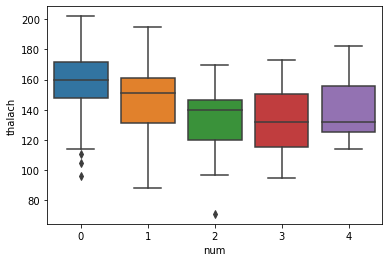

In [24]:
# У большинства здоровых пациентов большое значение максимальной частоты сердечных сокращений
sns.boxplot(x = "num", y = "thalach", data = pdata)

<AxesSubplot:xlabel='num', ylabel='ca'>

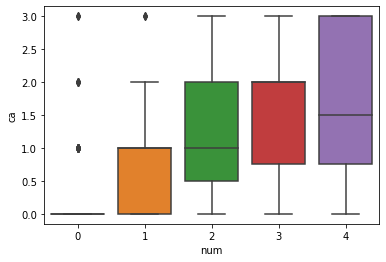

In [25]:
sns.boxplot(x = "num", y = "ca", data = pdata[pdata["ca"] != -9])

In [26]:
# У большинства здоровых пациентов при рентгеноскопии не окрасилось ни одного крупного сосуда
pdata[(pdata["num"] == 0) & (pdata["ca"] != -9)]["ca"].value_counts()

0    125
1     21
2      7
3      3
Name: ca, dtype: int64

### Качественные показатели

In [27]:
# Качественные показатели, в которых в зависимости от групп отличаются самые часто встречаемые значения
for num, s in sickgroups:
    print("n: {0:1}  restecg: {1:1}  exang: {2:1}  slope: {3:1}  thal: {4:1}".format(num,s["restecg"].mode()[0],s["exang"].mode()[0],s["slope"].mode()[0],s["thal"].mode()[0]))

n: 0  restecg: 0  exang: 0  slope: 1  thal: 3
n: 1  restecg: 2  exang: 0  slope: 2  thal: 7
n: 2  restecg: 0  exang: 1  slope: 2  thal: 7
n: 3  restecg: 2  exang: 1  slope: 2  thal: 7
n: 4  restecg: 2  exang: 0  slope: 2  thal: 7


In [28]:
pdata[pdata["slope"] != -9].groupby(["num", "slope"]).size().unstack(fill_value=0)

slope,1,2,3
num,,,
0,101,48,8
1,22,26,2
2,5,24,2
3,6,21,5
4,1,10,1


In [29]:
for num, s in sickgroups:
    slopegroups = s[s["slope"] != -9].groupby("slope")
    for slope, sl in slopegroups:
        print("n: {0:1}  slope: {1:1}  count: {2:3}  count/all: {3:6.2%}".format(num, slope, sl["id"].count(), sl["id"].count()/s["id"].count()))

n: 0  slope: 1  count: 101  count/all: 64.33%
n: 0  slope: 2  count:  48  count/all: 30.57%
n: 0  slope: 3  count:   8  count/all:  5.10%
n: 1  slope: 1  count:  22  count/all: 44.00%
n: 1  slope: 2  count:  26  count/all: 52.00%
n: 1  slope: 3  count:   2  count/all:  4.00%
n: 2  slope: 1  count:   5  count/all: 16.13%
n: 2  slope: 2  count:  24  count/all: 77.42%
n: 2  slope: 3  count:   2  count/all:  6.45%
n: 3  slope: 1  count:   6  count/all: 18.75%
n: 3  slope: 2  count:  21  count/all: 65.62%
n: 3  slope: 3  count:   5  count/all: 15.62%
n: 4  slope: 1  count:   1  count/all:  8.33%
n: 4  slope: 2  count:  10  count/all: 83.33%
n: 4  slope: 3  count:   1  count/all:  8.33%


In [30]:
# Качественный показатель thal обладает большей разницей по частотам среди здоровых и больных пациентов
pd.crosstab(pdata["num"], pdata[pdata["thal"] != -9]["thal"])

thal,3,6,7
num,,,
0,124,6,26
1,20,3,27
2,7,4,19
3,6,0,26
4,2,1,9


In [31]:
for num, s in sickgroups:
    thalgroups = s[s["thal"] != -9].groupby("thal")
    for thal, t in thalgroups:
        print("n: {0:1}  thal: {1:1}  count: {2:3}  count/all: {3:6.2%}".format(num, thal, t["id"].count(), t["id"].count()/s["id"].count()))

n: 0  thal: 3  count: 124  count/all: 78.98%
n: 0  thal: 6  count:   6  count/all:  3.82%
n: 0  thal: 7  count:  26  count/all: 16.56%
n: 1  thal: 3  count:  20  count/all: 40.00%
n: 1  thal: 6  count:   3  count/all:  6.00%
n: 1  thal: 7  count:  27  count/all: 54.00%
n: 2  thal: 3  count:   7  count/all: 22.58%
n: 2  thal: 6  count:   4  count/all: 12.90%
n: 2  thal: 7  count:  19  count/all: 61.29%
n: 3  thal: 3  count:   6  count/all: 18.75%
n: 3  thal: 7  count:  26  count/all: 81.25%
n: 4  thal: 3  count:   2  count/all: 16.67%
n: 4  thal: 6  count:   1  count/all:  8.33%
n: 4  thal: 7  count:   9  count/all: 75.00%


## Визуализация зависимостей показателей

### Два количественных показателя

<AxesSubplot:xlabel='age', ylabel='thalach'>

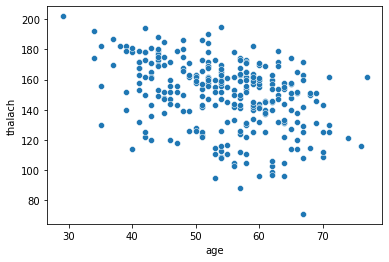

In [32]:
# С возрастом максимальная частота сердечных сокращений снижается
sns.scatterplot(x = "age", y = "thalach", data = pdata)

### Два качественных показателя

<AxesSubplot:xlabel='num', ylabel='count'>

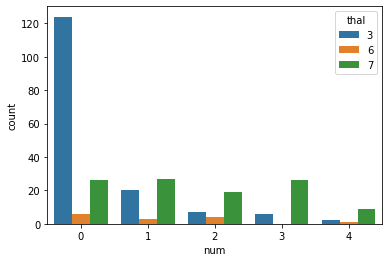

In [33]:
# Нормальный результат сцинтиграфии с таллием наблюдается у здоровых людей, а дефект - чаще у больных
sns.countplot(x="num", hue = "thal", data = pdata[pdata["thal"] != -9])

### Количественный и качественный показатели

<AxesSubplot:xlabel='cp', ylabel='age'>

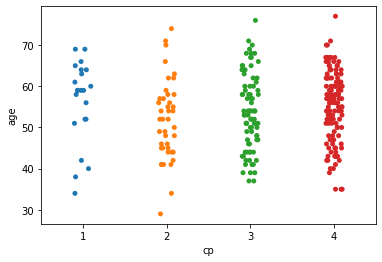

In [34]:
# Зависимость типа боли в груди от возраста
# У людей до 50 лет редко наблюдается типичная стенокардия (1)
sns.stripplot(x = "cp", y = "age", data = pdata)

## Пропуски данных и аномальные выбросы

Всего учитывались данные из 29 столбцов.<br>
Среди них 7 содержат пропуски данных.

In [35]:
for column in pdata.columns:
    if any(pdata[column] == -9):
        print("column: {0:10}  missing: {1:1}".format(column, (pdata[column] == -9).sum()))

column: dig         missing: 2
column: prop        missing: 2
column: nitr        missing: 2
column: pro         missing: 2
column: diuretic    missing: 2
column: ca          missing: 2
column: thal        missing: 2


In [36]:
# Всего 6 пациентов с пропущенными показателями
pdata[(pdata["dig"] == -9)|(pdata["prop"] == -9)|(pdata["nitr"] == -9)|(pdata["pro"] == -9)|(pdata["diuretic"] == -9)|(pdata["ca"] == -9)|(pdata["thal"] == -9)]["id"]

87      93
121    131
166    182
192    209
207    224
266    283
Name: id, dtype: int64

Так как dig, prop, nitr, pro, diuretic содержат качественные данные, вставим на места пропусков значения, которые чаще всего встречаются в данных столбцах. Для точности расчитаем эти данные в соответствии с группой заболевания пациентов.

In [37]:
# Группы заболевания пациентов с пропусками
pdata[(pdata["dig"] == -9)|(pdata["prop"] == -9)|(pdata["nitr"] == -9)|(pdata["pro"] == -9)|(pdata["diuretic"] == -9)]["num"]

121    4
207    3
Name: num, dtype: int64

In [38]:
insert = pdata.groupby("num")
for num, i in insert:
    if ((num == 3) | (num == 4)):
        print("n: {0:1}  dig: {1:1}  prop: {2:1}  nitr: {3:1}  pro: {4:1}  diuretic: {5:1}".format(num,i["dig"].mode()[0],i["prop"].mode()[0],i["nitr"].mode()[0],i["pro"].mode()[0],i["diuretic"].mode()[0]))

n: 3  dig: 0  prop: 0  nitr: 0  pro: 0  diuretic: 0
n: 4  dig: 0  prop: 0  nitr: 0  pro: 0  diuretic: 0


In [39]:
# Значения до замены
pdata.loc[[121, 207], ("dig", "prop", "nitr", "pro", "diuretic")]

,dig,prop,nitr,pro,diuretic
121,-9,-9,-9,-9,-9
207,-9,-9,-9,-9,-9


In [40]:
pdata.loc[[121, 207], ("dig", "prop", "nitr", "pro", "diuretic")] = 0

In [41]:
# Значения после замены
pdata.loc[[121, 207], ("dig", "prop", "nitr", "pro", "diuretic")]

,dig,prop,nitr,pro,diuretic
121,0,0,0,0,0
207,0,0,0,0,0


Показатель thal тоже качественный, для него аналогично расчитываем моду. Как было получено ранее, показатель обладает большей разницей по частотам среди здоровых и больных пациентов.

In [42]:
pdata[(pdata["thal"] == -9)]["num"]

87     0
266    2
Name: num, dtype: int64

In [43]:
for num, i in insert:
    if ((num == 0) | (num == 2)):
        print("n: {0:1}  thal: {1:1}".format(num, i["thal"].mode()[0]))

n: 0  thal: 3
n: 2  thal: 7


In [44]:
# Значения до замены
pdata.loc[[87, 266], "thal"]

87    -9
266   -9
Name: thal, dtype: int64

In [45]:
pdata.loc[87, "thal"] = 3
pdata.loc[266, "thal"] = 7

In [46]:
# Значения после замены
pdata.loc[[87, 266], "thal"]

87     3
266    7
Name: thal, dtype: int64

Показатель ca является количественным, для него посчитаем среднее арифметическое и округлим до целого

In [47]:
pdata[(pdata["ca"] == -9)]["num"]

166    0
192    1
Name: num, dtype: int64

In [48]:
for num, i in insert:
    if ((num == 0) | (num == 1)):
        print("n: {0:1}  ca: {1:1}".format(num, round(i["ca"].mean())))

n: 0  ca: 0
n: 1  ca: 1


In [49]:
# Значения до замены
pdata.loc[[166, 192], "ca"]

166   -9
192   -9
Name: ca, dtype: int64

In [50]:
pdata.loc[166, "ca"] = 0
pdata.loc[192, "ca"] = 1

In [51]:
# Значения после замены
pdata.loc[[166, 192], "ca"]

166    0
192    1
Name: ca, dtype: int64

In [52]:
# Проверка, что не осталось пустых значений. Так как ничего не вывелось, пустых значений нет
for column in pdata.columns:
    if any(pdata[column] == -9):
        print("column: {0:10}  missing: {1:1}".format(column, (pdata[column] == -9).sum()))